[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RikVoorhaar/probastat2020/blob/master/notebooks/serie8.ipynb?hl=fr)

# Série 8

## Exercice 1

<div class="alert alert-info">
**Exercice** 

On se donne $n$ points du plan : $(x_1,y_1),\dots,(x_n,y_n)$. Soit $(X,Y)$ la variable aléatoire de la loi uniforme à valeurs dans l'ensemble 

$$
\{(x_1,y_1),\dots,(x_n,y_n)\}
$$

Calculer 
    
$$
    \Phi(a,b)=\mathbb E[(Y-(aX+b))^2].
$$
    
Déterminer l'expression de la droite de régression linéaire.

</div>

On a que 

$$
\begin{align}
    \Phi(a,b) &= \mathbb E[(Y-(aX+b))^2]\\
    &= \frac1n \sum_{k=1}^n (y_i-(a x_i+b))^2\\
    &= \frac1n \left\|(y_1,\dots,y_n)^\top-\left(a(x_1,\dots,x_n)^\top+b\right)\right\|^2
\end{align}
$$

L'expression de la droite de régression linéaire est donnée pas $a_0X+b_0$ où $a_0,b_0$ sont telles que $\Phi(a_0,b_0)$ est minimale. Dans la cours on a vu qu'alors

$$
    a_0 = \frac{\operatorname{cov}(X,Y)}{\operatorname{Var}(X)},\qquad b_0=\mathbb E[Y]-a_0\mathbb E[X]
$$

Soit $\overline x$ et $\overline y$ les moyennes de $x$ et $x$. Comme $\operatorname{cov}(X,Y) = \mathbb E[(X-\overline x)(Y-\overline y)]$ on trouve que

$$
\begin{align}
    a_0 &=  \left(\frac1n\sum_{k=1}^n (x_k-\overline x)(y_k-\overline y)\right)\left(\frac1n\sum_{k=1}^n (x_k-\overline x)^2\right)^{-1}\\
    b_0 &= \overline y - a_0 \overline x
\end{align}
$$

On peut vérifier cette expression avec du code :

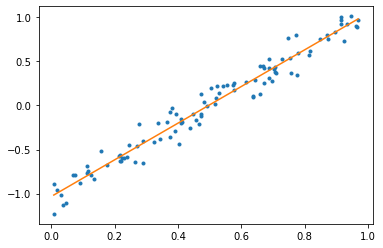

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Données artificielles
n = 100
X = np.random.uniform(0, 1, n)
X = np.sort(X)
Y = 2*X-1 + 0.1*np.random.normal(size=n)
plt.plot(X,Y,'.')

# Moyennes, covariance et variance
X_mean = np.sum(X) / n
Y_mean = np.sum(Y) / n
XY_cov = np.sum((X-X_mean)*(Y-Y_mean)) / n
X_var = np.sum((X-X_mean)**2) / n

# Tracer la droite de régression
a = XY_cov / X_var
b = Y_mean-a*X_mean
plt.plot(X, a*X+b);

## Exercice 2

<div class="alert alert-info">
**Exercice** 
    
Soient $X,Y:\Omega\to\mathbb R$ des v.a. indépendantes, de même espérance $\mu$, de même variance $\sigma^2$. Soit $S=X+Y$. Calculer
$\rho_{X,S}$ et calculer la droite de régression linéaire qui approxime la dépendance de $S$ en $X$.

_Suggestions_. Déduire de l'indépendance de $X$ et $Y$, par un simple calcul, que
$\mbox{Cov}(X,S)=\sigma^2$. Déduire de l'indépendance de $X$ et $Y$ que $\mbox{Var}(S)=2\sigma^2$.

</div>

Comme $X$ et $Y$ sont indépendantes et $\mathbb E[S] = 2\mu$, on a 

$$
\begin{align}
\mathrm{cov}(X,S)&=E[(X-\mu)(S-2\mu)]\\
&=E[(X-\mu)((X-\mu)+(Y-\mu))]\\
&=E[(X-\mu)(X-\mu)]+E[(X-\mu)(Y-\mu)]\\
&=E[(X-\mu)(X-\mu)]+\mathrm{cov}(X,Y)\\
&=\sigma^2.
\end{align}
$$

Rappelons que si $X$ et $Y$ sont indépendantes, alors $\mathrm{Var}(X+Y)=\mathrm{Var}(X)+\mathrm{Var}(Y)$, et donc $\mathrm{Var}(S)=2\sigma^2$.
On a alors par definition,

$$
    \rho_{X,S} = \frac{\mathrm{cov}(X,S)}{\sigma_X\sigma_S} = \frac{\sigma^2}{\sigma\sqrt{2\sigma^2}} = \frac{1}{\sqrt 2}
$$

La droite linéaire est donnée par $a_0X+b_0$ où

$$
\begin{align}
a_0 &= \rho_{X,S}\frac{\sigma_S}{\sigma_X} = 1,\\
b_0 &= \mathbb E[S]-a_0\mathbb E[X] = 2\mu-\mu=\mu
\end{align}
$$

La droite linéaire est alors $X+\mu$. 

## Exercice 3

<div class="alert alert-info">
**Exercice** (Deux estimateurs de l'espérance)
    
Soit $a>0$. Soit $X$ une variable aléatoire de loi uniforme 
à valeur dans l'intervalle $[0,2a]$. Soit $n$ un entier naturel et soit $X_1,X_2,\dots, X_n$ une suite de $n$ variables aléatoires indépendantes de même loi que $X$.
    
</div>

### Exercice 3a)

<div class="alert alert-info">
**Exercice** 

Soit
    
$$M_n=\frac{X_1+X_2+\cdots+X_n}{n}.$$ 
    
Prouver que $E[M_n]=a$ et que 
    
$$\mbox{Var}[M_n]=\frac{a^2}{3n}.$$

</div>

Comme $X$ est uniforme à $[0,2a]$, on a que $\mathbb E[X]=a$. Par linéarité de l'espérence on a donc que

$$
\mathbb E[M_n]=\frac{\mathbb E[X_1]+\mathbb E[X_2]+\cdots+\mathbb E[X_n]}{n} = a
$$

Rappelons que 

$$\mathbb {E}[X^2] = \int_0^{2a}\!\frac{t^2}{2a}\,\mathrm dt = \frac{(2a)^3}{3(2a)} = \frac{4 a^2}{3}$$

Et alors, 

$$
\mbox{Var}(X) = \mathbb {E}[X^2] - \mathbb E[X]^2 = \frac{4 a^2}{3}-a^2 = \frac{a^2}{3}
$$

Rappelons que la variance est additive pour des variables aléatoires indépendantes, et aussi que $\mbox{Var}(X/n) = \mbox{Var}(X)/n^2$. On a donc que

$$
\begin{align}
\mbox{Var}[M_n] &= \mbox{Var}\left[\sum_{i=1}^n\frac{X_i}{n}\right] = \sum_{i=1}^n\mbox{Var}\left[\frac{X_i}{n}\right]\\
&=\sum_{i=1}^n\frac{\mbox{Var}\left[X_i\right]}{n^2} = \sum_{i=1}^n\frac{a^2}{3n^2}\\
&=\frac{a^2}{3n}
\end{align}
$$

### Exercice 3b)

<div class="alert alert-info">
**Exercice**  
    
Soit
    
$$
T_n=\max(X_1,X_2,\dots,X_n).
$$
    
Prouver que $$P(T_n\leq x)=\left(\frac{x}{2a}\right)^n$$ et en déduire l'expression de  la densité de probabilité $f_{T_n}(x)$. Prouver que
    
$$
E[T_n]=2a\frac{n}{n+1},
$$

$$
\mbox{Var}[T_n]=4a^2\frac{n}{(n+2)(n+1)^2}.
$$

</div>

On a que $T_n\leq x$ si et seulement si $X_i\leq x$ pour chaque $i$, alors par l'indépendance 

$$
\begin{align}
    P(T_n\leq x) &= P(X_1\leq x,\,X_2\leq x,\dots,\,X_n\leq x)\\
    &= P(X_1\leq x)P(X_2\leq x)\dots P(X_n\leq x)\\
    &= \left(\frac{x}{2a}\right)^n
\end{align}
$$

La densité de $T_n$ est alors donnée par

$$
    f_{T_n}(x) = \frac{\mathrm d}{\mathrm d x}P(T_n\leq x) = \frac{n}{2a}\left(\frac{x}{2a}\right)^{n-1}
$$

Donc,

$$
\begin{align}
    E[T_n] &= \int_{0}^{2a}\frac{n}{2a}\left(\frac{x}{2a}\right)^{n-1}x\,\mathrm dx = \frac{n}{(2a)^n}\int_{0}^{2a}x^{n}\,\mathrm dx \\
    &= \left[\frac{n\,x^{n+1}}{(2a)^n(n+1)}\right]^{2a}_0\\
    &=2a\frac{n}{n+1}.
\end{align}
$$

Puis on calcule

$$
\begin{align}
    E[T_n^2] &= \int_{0}^{2a}\frac{n}{2a}\left(\frac{x}{2a}\right)^{n-1}x^2\,\mathrm dx = \frac{n}{(2a)^n} \int_{0}^{2a}x^{n+1}\,\mathrm dx\\
    &= \left[\frac{n\,x^{n+2}}{(2a)^n (n+2)}\right]^{2a}_0\\
    &=4a^2\frac{n}{n+2}
\end{align}
$$

Et finalement, 

$$
\begin{align}
    \mbox{Var}[T_n] &= E[T_n^2]-E[T_n]^2\\
    &= 4a^2\frac{n}{n+2} - 4a^2\frac{n^2}{(n+1)^2}\\
    &= 4a^2\frac{n(n+1)^2-n^2(n+2)}{(n+2)(n+1)^2}\\
    &=4a^2\frac{n^3+2n^2+n-n^3-2n^2}{(n+2)(n+1)^2}\\
    &=4a^2\frac{n}{(n+2)(n+1)^2}\\
\end{align}
$$

### Exercice 3c)

<div class="alert alert-info">
**Exercice** 

Soit $U_n=\frac{n+1}{2n}T_n$. Prouver que $E[U_n]=a$ et que 

$$\mbox{Var}[U_n]=\frac{a^2}{n(n+2)}.$$

</div>

On a simplement que 

$$
    E[U_n] =\frac{n+1}{2n}E[T_n]=a,
$$

et

$$
\begin{align}
\mbox{Var}[U_n] &= \frac{(n+1)^2}{4n^2}\mbox{Var}[T_n]\\
&=\frac{(n+1)^2}{4n^2}\frac{4a^2n}{(n+2)(n+1)^2}\\
&=\frac{a^2}{n(n+2)}
\end{align}
$$

### Exercice 3d)

<div class="alert alert-info">
**Exercice** 
    
Quel estimateur de la moyenne de $X$ choisissez-vous ? Plutôt $M_n$ ou plutôt $U_n$ ?

</div>

On choisit $U_n$, car la variance de $U_n$ est plus petite. 

On peut voir visuelemnt la différence entre les estimateurs ci-dessous. On prend $a=1$ et $n=5$ et on voit que la densité de $U_n$ et beaucoup plus concentré que $M_n$.

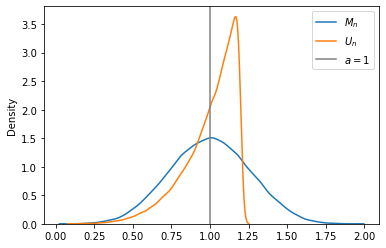

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a = 1
n = 5

X = np.random.uniform(0,2*a,size=(n,100000))
M = np.mean(X,axis=0)
U = np.max(X,axis=0)*(n+1)/(2*n)

sns.kdeplot(M,label="$M_n$");
sns.kdeplot(U,label="$U_n$");
plt.axvline(x=1,c='gray',label='$a=1$')
plt.legend();

On a aussi le estimateur du maximum de vraisemblance. Soit $A$ un variable aléatoire qui décrit la paramètre $a$. La vraisemblance $L(a)$ dans cas discrète est defini par

$$
    L(a) = P(X_1=x_1,\dots,X_n=x_n | A=a)
$$

En cas continue c'est une densité. Dans ce cas uniforme, le densité sachant $A=a$ est $\frac{1}{2a}$, donc si on a des observations $(x_1,\dots,x_n)$, on a vraisemblance

$$
    L(a) = \frac{1}{(2a)^n}
$$

qui est minimale pour $\hat a = \frac12\max(x_1,\dots,x_n)$, car un valeur plut petit que ça n'est pas possible.

On peut aussi normaliser le vraisemblance pour trouver une densité de probabilité de paramètre $a$ sachant les observations:

$$
f_A(a) = L(a) \cdot\left( \int_{\hat a}^\infty L(a)\right)^{-1} = \frac{\hat a^{n-1} (n-1)}{a^n}
$$

(si $a\geq\hat a$ et $f_A(a)=0$ si $a<\hat a$.)

Le moyenne de cette denstité est 

$$
\mathbb E[A] = \frac{\hat a(n-1)}{n-2}
$$

Par exemple pour $n=5$ et $\hat a = 0.9$ on trace la densité de $A$:

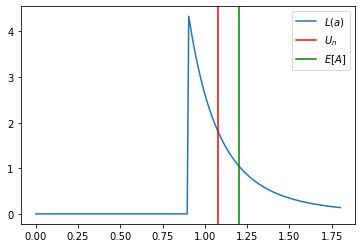

In [67]:
n = 5
a_hat = 0.9
a = np.linspace(1e-4,2*a_hat,num=200)

plt.plot(a, a_hat**(n-1)*(n-1)/a**n*(a >= a_hat), label="$L(a)$")
plt.axvline(a_hat*(n+1)/n, c='r', label="$U_n$")
plt.axvline(a_hat*(n-1)/(n-2), c='g', label="$E[A]$")
plt.legend();